<h1 style="color:red;">Limpieza del dataset Mushrooms</h1>
Enlace donde obtener el dataset y toda la información sobre sus columnas

https://www.kaggle.com/datasets/uciml/mushroom-classification

<h1 style="color:red;">Carga del dataset</h1>
Carga del dataset, leer conjunto de datos y primer vistazo (5 primeras filas).
Y hacer una copia del dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


sns.set_theme(style="whitegrid")


df = pd.read_csv("../data/raw/mushrooms.csv")

print({df.shape})
df.head()

{(8124, 23)}


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [11]:
df_copy = df.copy()

<h1 style="color:red;">Exploración de datos</h1>

In [12]:
df_copy.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [17]:
df_copy.info()

<class 'pandas.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   str  
 1   cap-shape                 8124 non-null   str  
 2   cap-surface               8124 non-null   str  
 3   cap-color                 8124 non-null   str  
 4   bruises                   8124 non-null   str  
 5   odor                      8124 non-null   str  
 6   gill-attachment           8124 non-null   str  
 7   gill-spacing              8124 non-null   str  
 8   gill-size                 8124 non-null   str  
 9   gill-color                8124 non-null   str  
 10  stalk-shape               8124 non-null   str  
 11  stalk-root                8124 non-null   str  
 12  stalk-surface-above-ring  8124 non-null   str  
 13  stalk-surface-below-ring  8124 non-null   str  
 14  stalk-color-above-ring    8124 non-null   str  
 15

<h1 style="color:red;">Nulos</h1>
Se puede ver que el dataset no contiene ningun valor nulo

In [18]:
df_copy.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

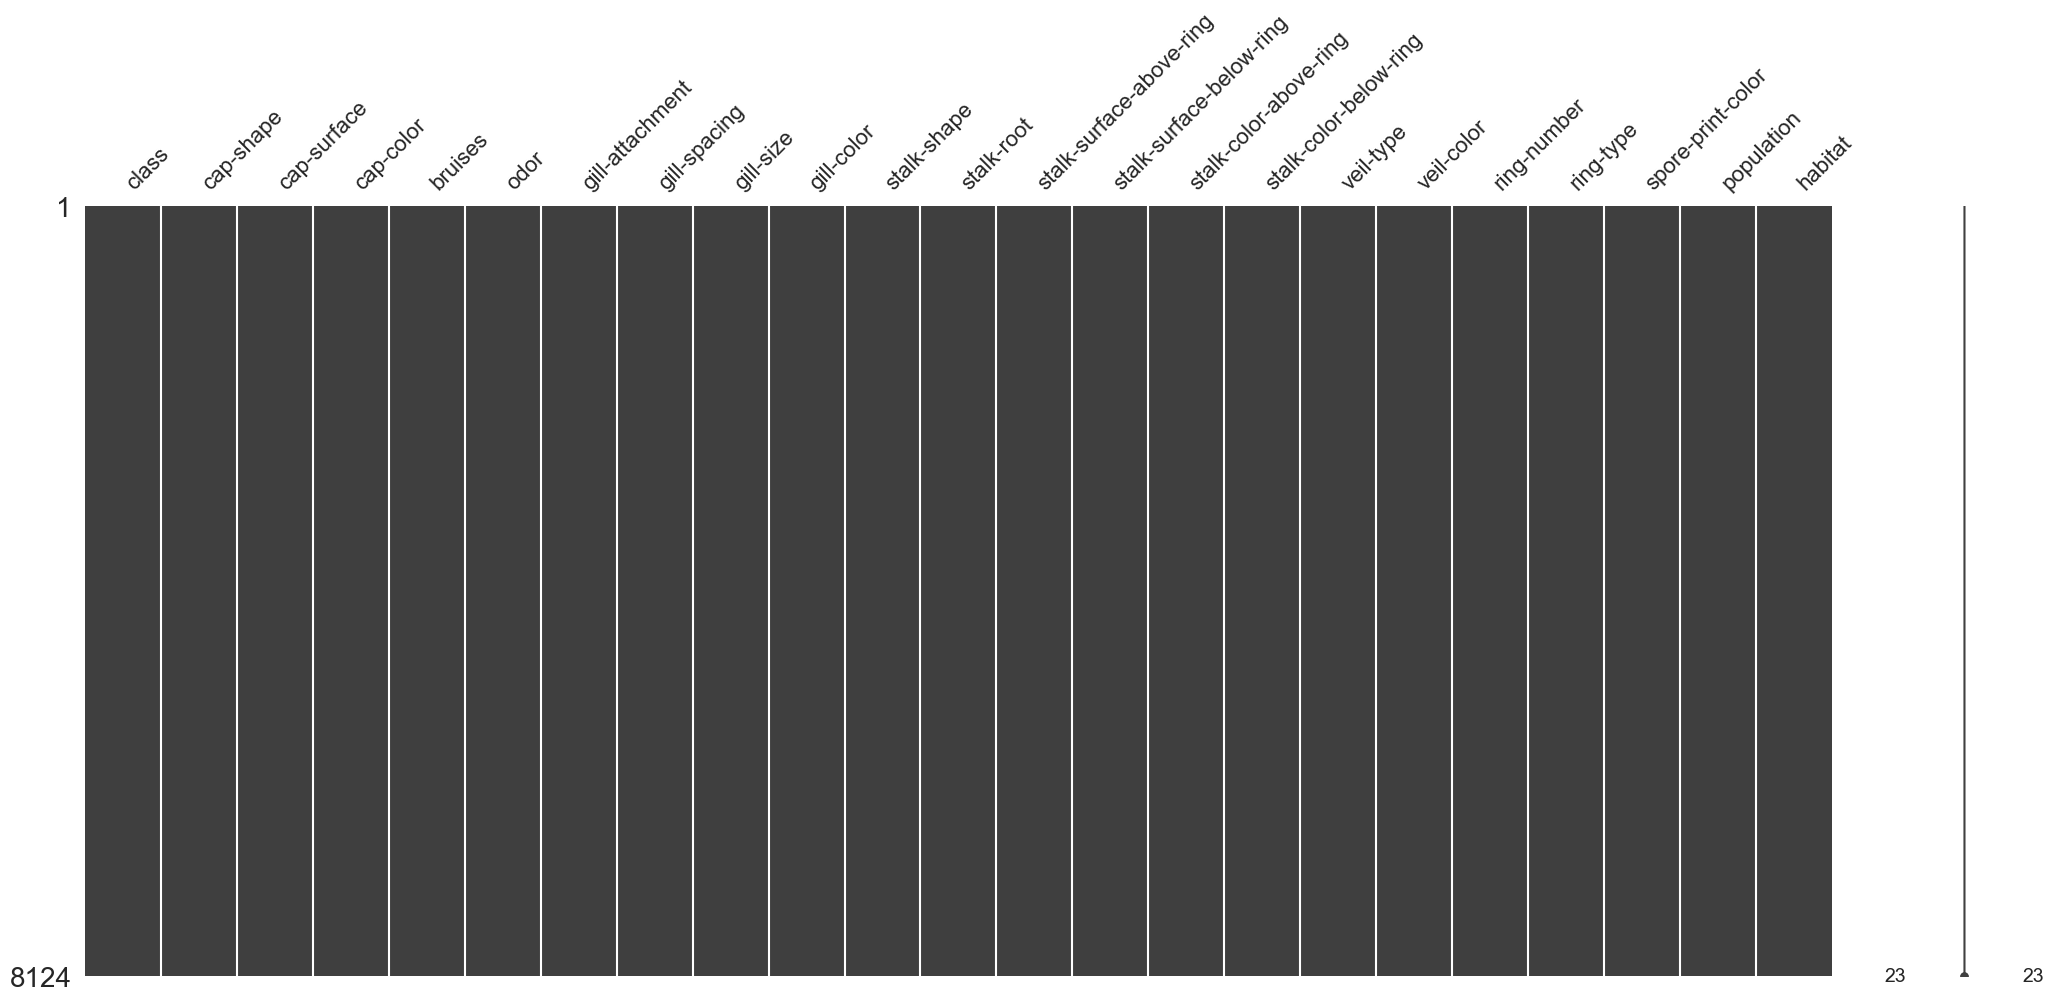

In [19]:
msno.matrix(df_copy)
plt.show()

<h1 style="color:red;">Visualización de valores únicos</h1>

In [20]:
for col in df_copy.columns:
    print(f"\nColumna: {col}")
    print(df_copy[col].unique())


Columna: class
<StringArray>
['p', 'e']
Length: 2, dtype: str

Columna: cap-shape
<StringArray>
['x', 'b', 's', 'f', 'k', 'c']
Length: 6, dtype: str

Columna: cap-surface
<StringArray>
['s', 'y', 'f', 'g']
Length: 4, dtype: str

Columna: cap-color
<StringArray>
['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r']
Length: 10, dtype: str

Columna: bruises
<StringArray>
['t', 'f']
Length: 2, dtype: str

Columna: odor
<StringArray>
['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
Length: 9, dtype: str

Columna: gill-attachment
<StringArray>
['f', 'a']
Length: 2, dtype: str

Columna: gill-spacing
<StringArray>
['c', 'w']
Length: 2, dtype: str

Columna: gill-size
<StringArray>
['n', 'b']
Length: 2, dtype: str

Columna: gill-color
<StringArray>
['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o']
Length: 12, dtype: str

Columna: stalk-shape
<StringArray>
['e', 't']
Length: 2, dtype: str

Columna: stalk-root
<StringArray>
['e', 'c', 'b', 'r', '?']
Length: 5, dtype: str

Columna: stalk-surf

<h1 style="color:red;">Columna stalk-root</h1>
La columna stalk--root tiene un valor "?"el cual es un nulo, se comprueba cuantos valores "?" contiene y con ello se decide que hacer

In [ ]:
#renombrar el valor "?" a NaN en la columna "stalk-root"
df_copy["stalk-root"] = df_copy["stalk-root"].replace("?", np.nan)

In [ ]:
#contar el número de valores nulos en la columna "stalk-root"
df_copy["stalk-root"].isnull().sum()

np.int64(2480)

In [24]:
print("Columna: stalk-root")
valores = df_copy["stalk-root"].unique()
print(valores)
print("Length:", len(valores))

Columna: stalk-root
<StringArray>
['e', 'c', 'b', 'r', nan]
Length: 5, dtype: str
Length: 5


In [25]:
df_copy["stalk-root"] = df_copy["stalk-root"].fillna("missing")

# Conclusión
La variable stalk-root presenta aproximadamente un 30% de valores faltantes representados como "?".
Dado que sigue conservando información en el 70% restante y puede aportar capacidad predictiva, se decide tratar los valores faltantes como una categoría independiente en lugar de eliminar la variable o las observaciones.

<h1 style="color:red;">Eliminación de columnas</h1>
La variable veil-type se elimina del análisis ya que presenta un único valor en todas las observaciones, por lo que no aporta capacidad predictiva ni variabilidad al modelo.

In [21]:
df_copy.drop(columns=["veil-type"], inplace=True)
df_copy.info()

<class 'pandas.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   str  
 1   cap-shape                 8124 non-null   str  
 2   cap-surface               8124 non-null   str  
 3   cap-color                 8124 non-null   str  
 4   bruises                   8124 non-null   str  
 5   odor                      8124 non-null   str  
 6   gill-attachment           8124 non-null   str  
 7   gill-spacing              8124 non-null   str  
 8   gill-size                 8124 non-null   str  
 9   gill-color                8124 non-null   str  
 10  stalk-shape               8124 non-null   str  
 11  stalk-root                8124 non-null   str  
 12  stalk-surface-above-ring  8124 non-null   str  
 13  stalk-surface-below-ring  8124 non-null   str  
 14  stalk-color-above-ring    8124 non-null   str  
 15

<h1 style="color:red;">Cambio de tipos</h1>
Se pasan todas las columnas a formato categoricas

In [27]:
df_copy = df_copy.astype("category")
df_copy.info()

<class 'pandas.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   category
 14  sta

<h1 style="color:red;">Feturing Engineering</h1>
Se crea la columna "has odor" a raiz de la columna "odor"ya que veo interesante una columna específica que nos diga si la seta en cuestión es inolora o no.

In [28]:
df_copy["has_odor"] = df_copy["odor"].apply(lambda x: 0 if x == "n" else 1)
df_copy.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,has_odor
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u,1
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g,1
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m,1
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u,1
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g,0


<h1 style="color:red;">Exportación del dataset limpio</h1>


In [29]:
df_copy.to_csv("../data/clean/clean_mushrooms.csv", index=False)